# Telecom Company Churn Analysis

### Importing dependencies

In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

### Imporing Data

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Cleaning

In [5]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [6]:
df.TotalCharges.dtype

dtype('float64')

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
#Dropping null values

df.dropna(inplace=True)

In [9]:
df.shape

(7032, 21)

In [10]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [11]:
df['Churn'].replace(to_replace={'Yes': 1, 'No': 0}, inplace=True)

### Exploratory Data Analysis

#### 1. Demographic Variables

- *Gender*

Male      0.504693
Female    0.495307
Name: gender, dtype: float64


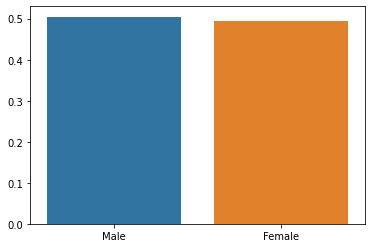

In [12]:
relative = df['gender'].value_counts(normalize=True)

sns.barplot(x=relative.index, y=relative.values)
print(relative)

- *Age*

0    0.8376
1    0.1624
Name: SeniorCitizen, dtype: float64


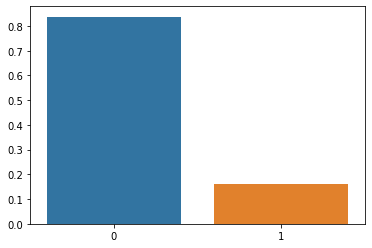

In [13]:
relative = df['SeniorCitizen'].value_counts(normalize=True)
sns.barplot(x=relative.index, y=relative.values);
print(relative)

- *Partner*

No     0.517491
Yes    0.482509
Name: Partner, dtype: float64


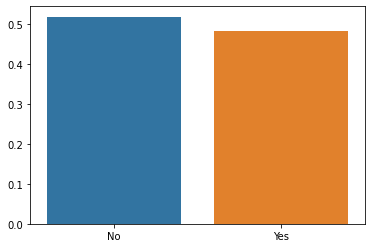

In [14]:
relative = df['Partner'].value_counts(normalize=True)
sns.barplot(x=relative.index, y=relative.values)
print(relative)

- *Dependents*

No     0.701507
Yes    0.298493
Name: Dependents, dtype: float64


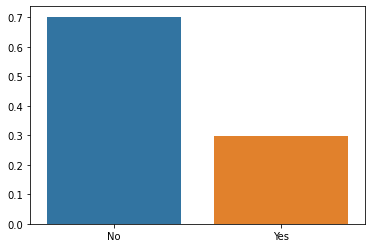

In [15]:
relative = df['Dependents'].value_counts(normalize=True)
sns.barplot(x=relative.index, y=relative.values)
print(relative)

#### 2. Customer Account Information

- *Tenure*

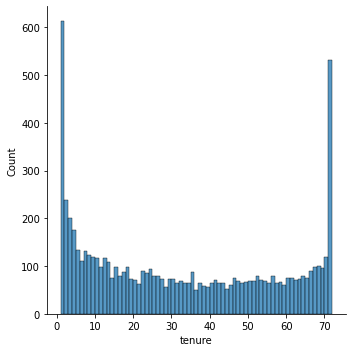

In [16]:
sns.displot(df['tenure'], binwidth= 1)

- *Contract*

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


<AxesSubplot:xlabel='Contract', ylabel='count'>

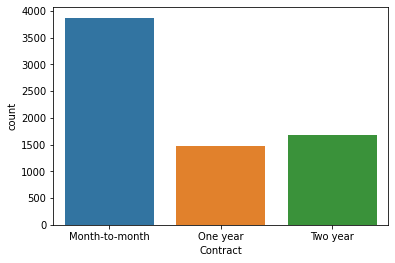

In [17]:
print(df['Contract'].value_counts())
sns.countplot(data=df, x='Contract')

- *Tenure based on contract length*

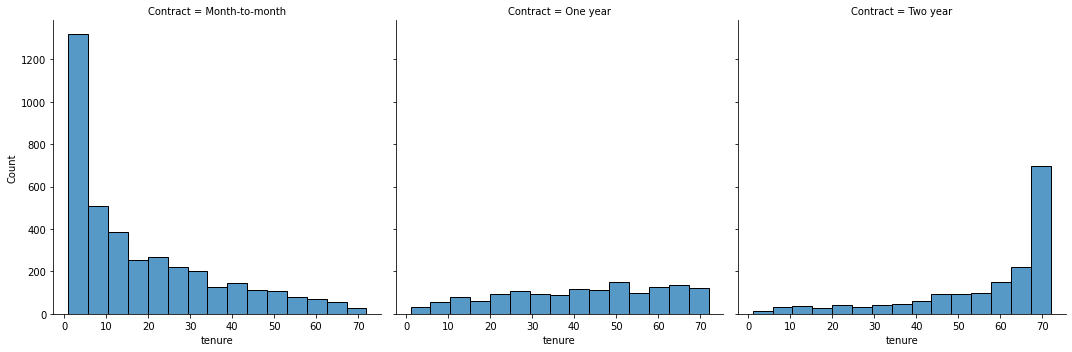

In [18]:
sns.displot(data=df, x='tenure',col='Contract')

#### 3. various services used by customers

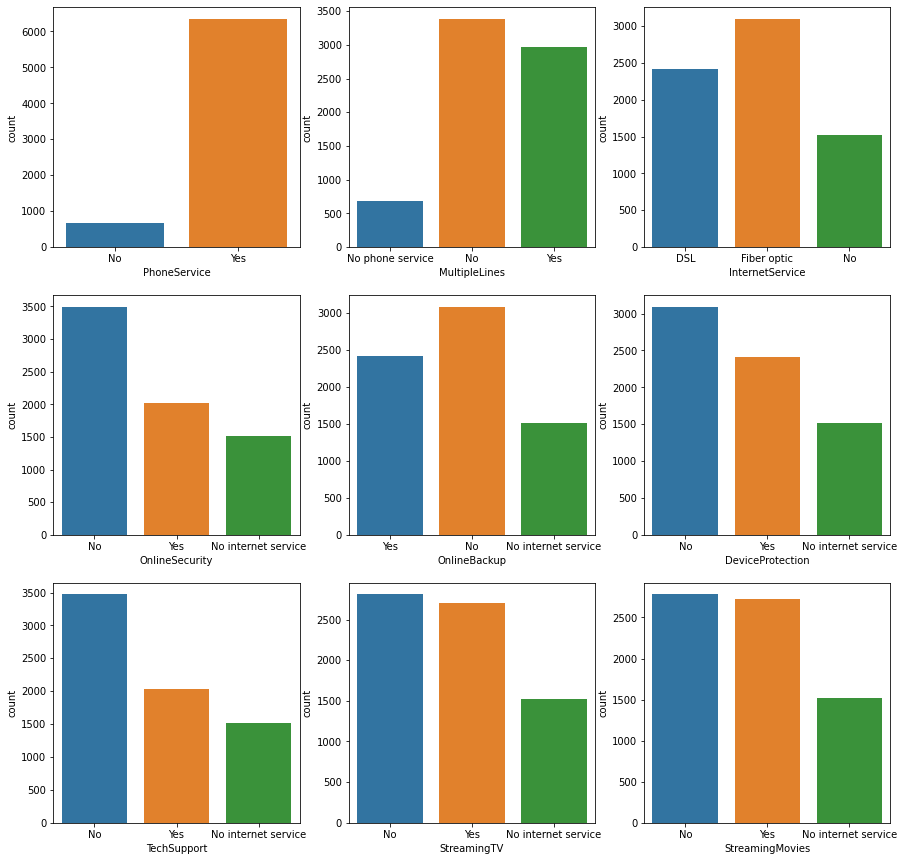

In [19]:
#column with serices

services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']



fig, ax = plt.subplots(3,3, figsize= (15, 15))

for i in range(3):
    for j in range(3):
        sns.countplot(data=df, x=services[3*i+j], ax=ax[i,j])


#### 4. Relationship between Monthly and Total Charges

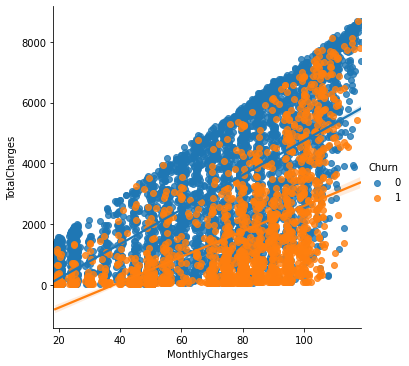

In [20]:
sns.lmplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')

####  5. Churn Rate and its relationship with other features

In [21]:
df2 = df.drop(columns='customerID')
df_dummies = pd.get_dummies(df2)

<AxesSubplot:>

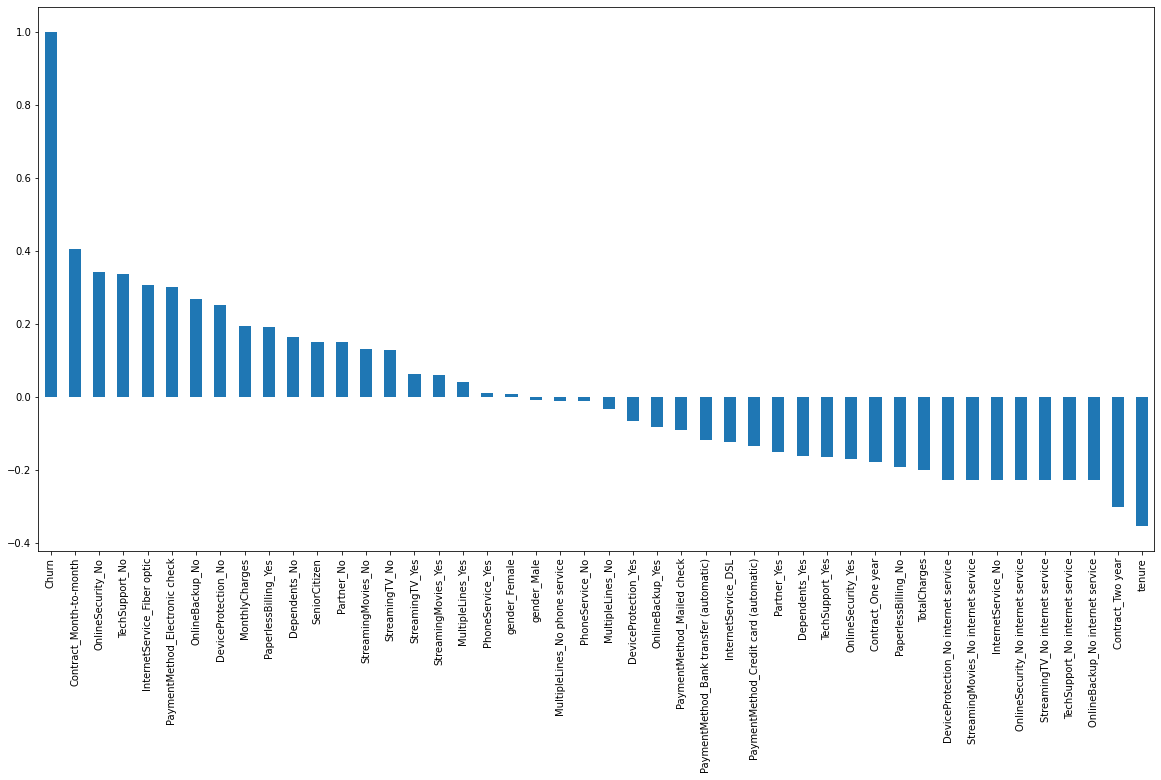

In [22]:
plt.figure(figsize=(20,10))
churn_corr = df_dummies.corr()['Churn'].sort_values(ascending = False)

churn_corr.plot(kind='bar')

0    5163
1    1869
Name: Churn, dtype: int64


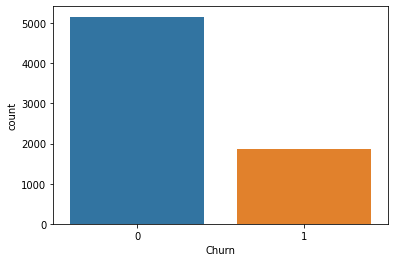

In [23]:
#churn rate

df['Churn'].value_counts(normalize=True)
sns.countplot(data=df, x='Churn')
print(df['Churn'].value_counts())

- *Churn vs Tenure*

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

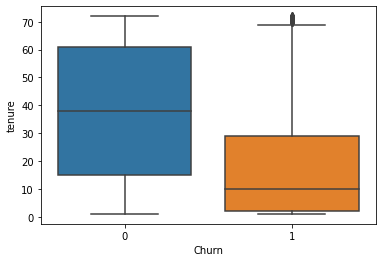

In [24]:
sns.boxplot(data=df, x='Churn', y='tenure')

Customers who do not churn, stay for a longer tenure.

- *Churn by Contract*

<AxesSubplot:xlabel='Contract', ylabel='count'>

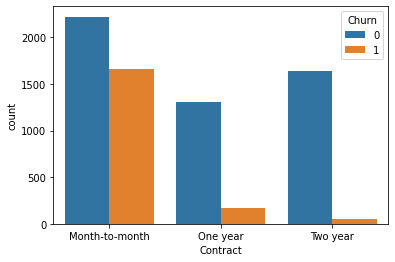

In [25]:
sns.countplot(data=df, x='Contract', hue='Churn')

Customers with month to month contract have a very high churn rate.

- *Churn by Age*

Churn             0     1
SeniorCitizen            
0              4497  1393
1               666   476


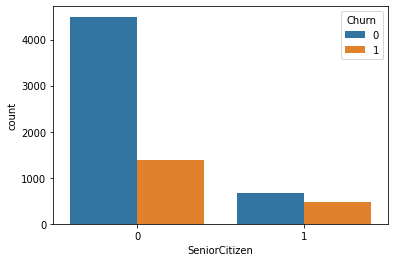

In [26]:
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
age_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()
print(age_churn)

A larger portion of Senior citizen do churn as compared to the  young citizen.

- *Churn by Monthly Charges* 

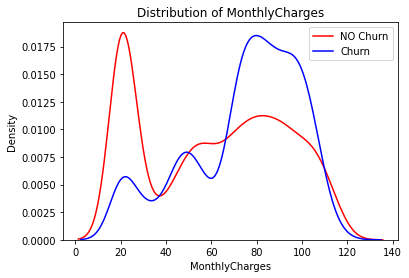

In [27]:
sns.kdeplot(data=df[df['Churn']== 0], x='MonthlyCharges', color='red', label='NO Churn');
sns.kdeplot(data=df[df['Churn']== 1], x='MonthlyCharges', color='blue', label='Churn');
plt.title('Distribution of MonthlyCharges')
plt.legend();

Higher % of customers churn when the monthly charges are high.

- *Churn by Total Charges*

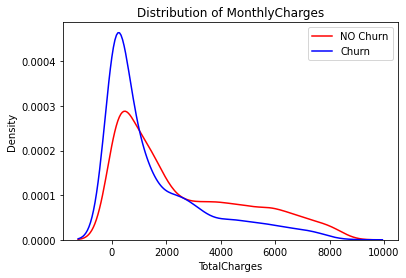

In [28]:
sns.kdeplot(data=df[df['Churn']== 0], x='TotalCharges', color='red', label='NO Churn');
sns.kdeplot(data=df[df['Churn']== 1], x='TotalCharges', color='blue', label='Churn');
plt.title('Distribution of MonthlyCharges')
plt.legend();

It seems that there is higer churn when the total charges are lower.

## Predictive Modeling

In [29]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [30]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.metrics import classification_report

#### 1. Logistic Regression

In [32]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

#making prediction
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.54      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



In [33]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(class_weight='balanced')
clf.fit(X_train, y_train)

#making prediction
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1580
           1       0.50      0.77      0.60       530

    accuracy                           0.75      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.80      0.75      0.76      2110



#### 2. Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
clf_rf.fit(X_train, y_train)

# Making predictions
y_pred = clf_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1580
           1       0.67      0.50      0.57       530

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.72      2110
weighted avg       0.80      0.81      0.80      2110



In [35]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30, class_weight='balanced')
clf_rf.fit(X_train, y_train)

# Making predictions
y_pred = clf_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1580
           1       0.50      0.75      0.60       530

    accuracy                           0.75      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.80      0.75      0.76      2110



#### 3. Support Vector Machine

In [36]:
from sklearn.svm import SVC

clf = SVC(kernel='linear') 
clf.fit(X_train,y_train)

# Make predictions
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.63      0.52      0.57       530

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [37]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', class_weight='balanced') 
clf.fit(X_train,y_train)

# Make predictions
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1580
           1       0.43      0.80      0.56       530

    accuracy                           0.69      2110
   macro avg       0.67      0.73      0.66      2110
weighted avg       0.79      0.69      0.71      2110



As the data is imbalanced, standard classifiers produce small value of recall for churn variable. Adding weight to the positive value of churn variable by using balanced class_weight, improves the recall metrics.